<a href="https://colab.research.google.com/github/RITIKA-SHARMAA/ML/blob/main/8-Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Data dictionary
data = {
    "company": [
        "google", "google", "google", "google", "google", "google",
        "abc pharma", "abc pharma", "abc pharma", "abc pharma",
        "facebook", "facebook", "facebook", "facebook", "facebook", "facebook"
    ],
    "job": [
        "sales executive", "sales executive", "business manager", "business manager",
        "computer programmer", "computer programmer",
        "sales executive", "computer programmer", "business manager", "business manager",
        "sales executive", "sales executive", "business manager", "business manager",
        "computer programmer", "computer programmer"
    ],
    "degree": [
        "bachelors", "masters", "bachelors", "masters", "bachelors", "masters",
        "masters", "bachelors", "bachelors", "masters",
        "bachelors", "masters", "bachelors", "masters", "bachelors", "masters"
    ],
    "salary_more_than_100k": [
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1
    ]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)


       company                  job     degree  salary_more_than_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors                      1
13    facebook     b

# **DECISION TREE**

In [6]:
inputs = df.drop('salary_more_than_100k', axis='columns')
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [15]:
target = df['salary_more_than_100k']
target

,salary_more_than_100k
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


In [7]:
sal = df['salary_more_than_100k']
sal.head()

,salary_more_than_100k
0,0
1,0
2,1
3,1
4,0


In [8]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [9]:
inputs['company_n'] = le_company.fit_transform(inputs ['company'])
inputs['job_n'] = le_job.fit_transform(inputs ['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs ['degree'])
inputs

# abc - 0, facebook- 1, google- 2
# BM - 0, CP - 1, SE -2
# B - 0, M - 1

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


fit_transform funcion in LabelEncoder  trains itself according to the company/ job / degree coloumn in the data and stores the new transformed coloumn in a new colomn.

In [11]:
inputs_n = inputs.drop (['company', 'job', 'degree'], axis= 'columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [12]:
from sklearn import tree
model= tree.DecisionTreeClassifier()


In [16]:
model.fit( inputs_n, target)  # model.fit(input, output)

DecisionTreeClassifier()

In [17]:
model.score(inputs_n, target)

1.0

In [20]:
model. predict([[2,1,0]])  # a computer engineere at google done bachlors

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
model. predict([[2,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

arr[0] = salary is not greater than 10000

# Exercise

In [23]:
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.drop([ 'PassengerId','Name','Ticket','Cabin','Embarked'], axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [25]:
inputs = df.drop('Survived',axis='columns')
inputs.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [26]:
target = df.Survived
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [27]:
#  LabelEncoder

inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
inputs.head()


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,2,38.0,1,0,71.2833
2,3,2,26.0,0,0,7.9250
3,1,2,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [28]:
inputs.Age[:10]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [30]:
# Data preprocessing >> replacing the null values from the mean of the coloumns

inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.Age[:10]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
5,29.699118
6,54.000000
7,2.000000
8,27.000000
9,14.000000


In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)


In [38]:
len(target)

891

In [33]:
len(X_train)


712

In [34]:
len(X_test)

179

In [35]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [39]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
model.score(X_test,y_test)

0.776536312849162

In [43]:
print(model.feature_names_in_)


['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare']


In [50]:
test_input = pd.DataFrame({
    'Pclass': [3],
    'Sex': [1],
    'Age': [25.0],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [10.5]
})
prediction = model.predict(test_input)
prediction

# 0 = not survied, 1 = survied


array([0])

In [51]:
test_input = pd.DataFrame({
    'Pclass': [1],
    'Sex': [2],
    'Age': [35.0],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [75.5]
})
prediction = model.predict(test_input)
prediction

array([1])

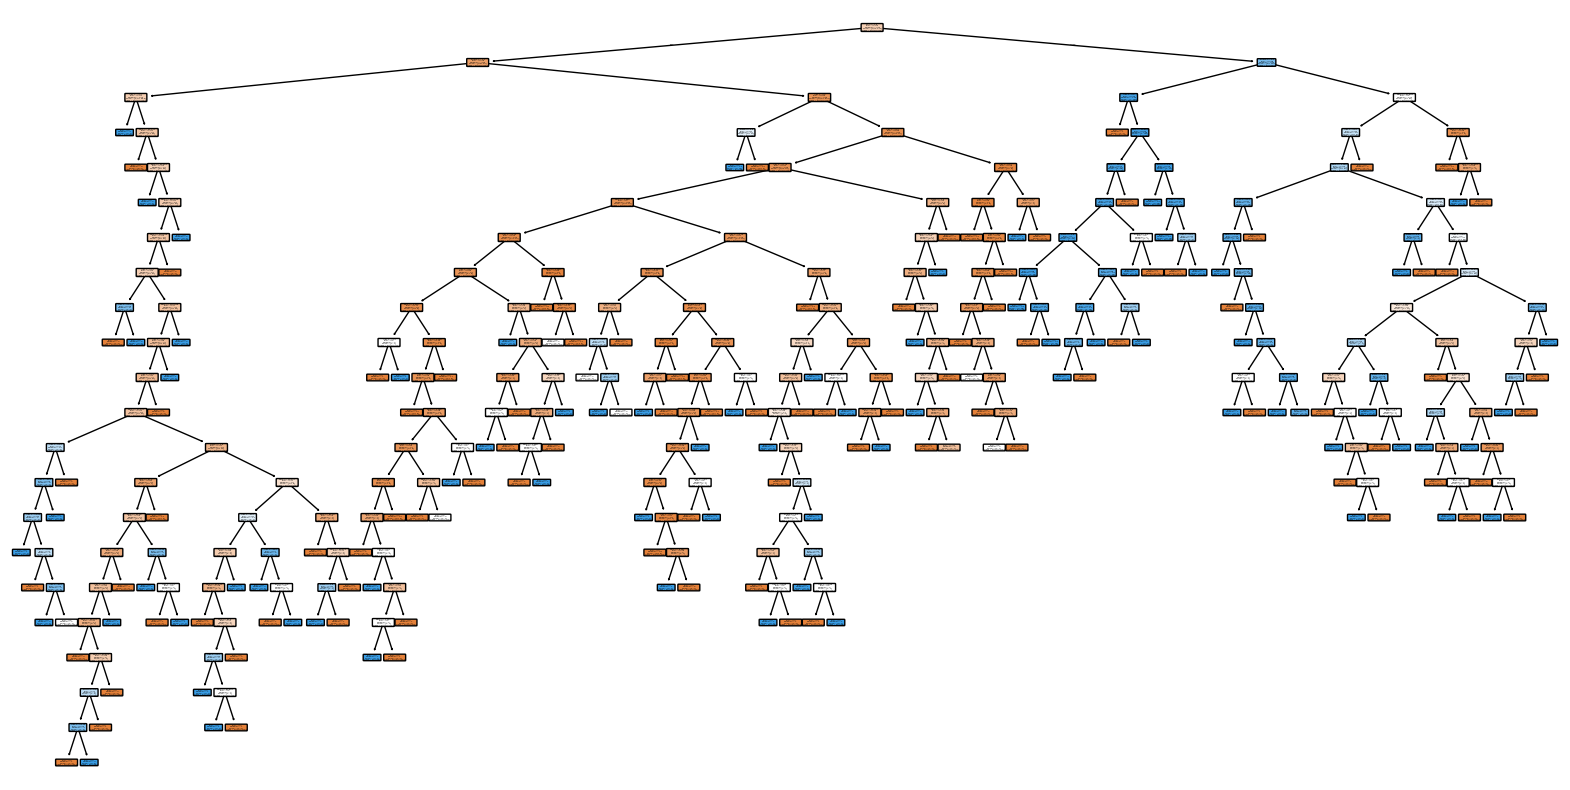

In [52]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=inputs.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True
)
plt.show()

In [54]:
print(model.feature_names_in_)



['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare']


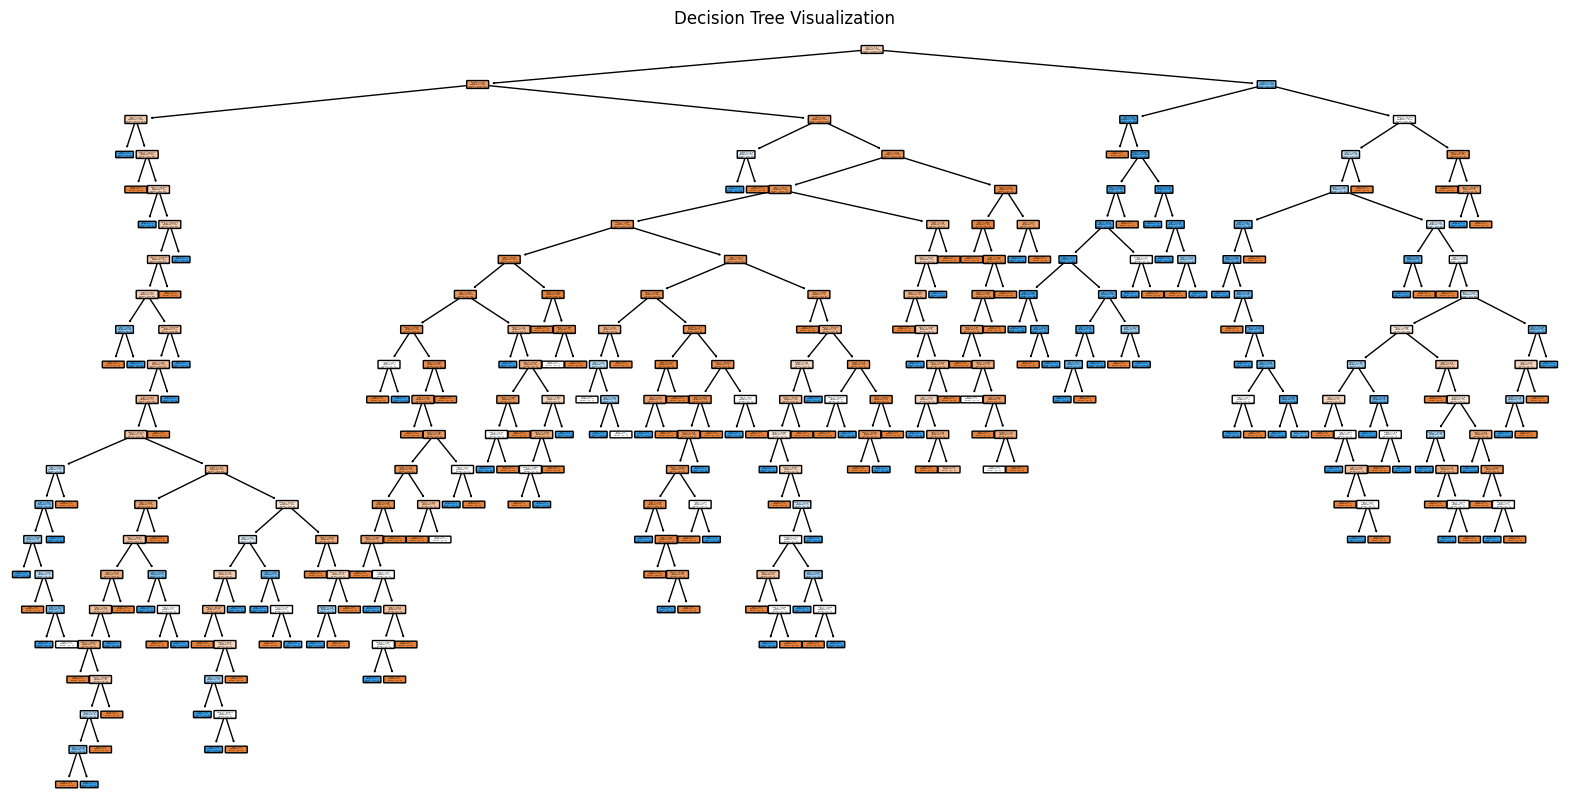

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],  # Match the training features
    class_names=['Not Survived', 'Survived'],  # Target labels
    filled=True,  # Add color for better understanding
    rounded=True  # Rounded edges for clarity
)
plt.title("Decision Tree Visualization")
plt.show()
